<a href="https://colab.research.google.com/github/UniVR-DH/DKR-course/blob/main/L12-SPARQL/Sparql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDF & SPARQL

Original source code derived from <a href="https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Sparql.ipynb" target="_parent">joerg84/Graph_Powered_ML_Workshop</a>

In this notebook we will explore basic RDF and SPARQL queries.

# Setup Environment

In [1]:
%%capture
!pip3 install rdflib sparqlwrapper pydotplus graphviz

In [2]:
import rdflib
from rdflib import Graph
from rdflib.namespace import DC, RDF, FOAF, RDFS
from rdflib import URIRef, BNode, Literal
import networkx as nx
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [3]:
# Helper function for vizualizing RDF graph
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

# First Graph

In [5]:
g = Graph()
# Graph using TTL syntax
TTLdata = """\
@prefix schema: <http://schema.org/> .
@prefix loc: <http://localhost:8080/data/person/> .

loc:amy-farrah-fowler
  a schema:Person ;
  schema:additionalName "Farrah" ;
  schema:familyName "Fowler" ;
  schema:givenName "Amy" ;
  schema:jobTitle "neurobiologist" ;
  schema:knows loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:bernadette-rostenkowski
  a schema:Person ;
  schema:additionalName "Maryann" ;
  schema:familyName "Rostenkowski-Wolowitz" ;
  schema:givenName "Bernadette" ;
  schema:jobTitle "microbiologist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom;
  schema:spouse loc:howard-wolowitz .

loc:howard-wolowitz
  a schema:Person ;
  schema:additionalName "Joel" ;
  schema:familyName "Wolowitz" ;
  schema:givenName "Howard" ;
  schema:jobTitle "aerospace engineer" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom;
  schema:spouse loc:bernadette-rostenkowski .

loc:leonard-hofstadter
  a schema:Person ;
  schema:additionalName "Leakey" ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressLocality "Pasadena" ;
    schema:addressRegion "CA" ;
    schema:postalCode "91104" ;
    schema:streetAddress "2311 North Los Robles Avenue, Apartment 4A"
  ] ;
  schema:familyName "Hofstadter" ;
  schema:givenName "Leonard" ;
  schema:jobTitle "experimental physicist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:mary-cooper,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:mary-cooper
  a schema:Person ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressRegion "TX"
  ] ;
  schema:children loc:sheldon-cooper ;
  schema:familyName "Cooper" ;
  schema:givenName "Mary" ;
  schema:knows loc:howard-wolowitz,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper .

loc:penny
  a schema:Person ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressLocality "Pasadena" ;
    schema:addressRegion "CA" ;
    schema:postalCode "91104" ;
    schema:streetAddress "2311 North Los Robles Avenue, Apartment 4B"
  ] ;
  schema:givenName "Penny" ;
  schema:jobTitle "pharmaceutical sales representative" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:rajesh-koothrappali
  a schema:Person ;
  schema:additionalName "Ramayan Raj" ;
  schema:familyName "Koothrappali" ;
  schema:givenName "Rajesh" ;
  schema:jobTitle "astrophysicist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:sheldon-cooper,
               loc:stuart-bloom .

loc:sheldon-cooper
  a schema:Person ;
  schema:additionalName "Lee" ;
  schema:address [
    schema:addressCountry "US" ;
    schema:addressLocality "Pasadena" ;
    schema:addressRegion "CA" ;
    schema:postalCode "91104" ;
    schema:streetAddress "2311 North Los Robles Avenue, Apartment 4A"
  ] ;
  schema:familyName "Cooper" ;
  schema:givenName "Sheldon" ;
  schema:jobTitle "theoretical physicist" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:stuart-bloom ;
  schema:parent loc:mary-cooper .

loc:stuart-bloom
  a schema:Person ;
  schema:familyName "Bloom" ;
  schema:givenName "Stuart" ;
  schema:jobTitle "comic book store owner" ;
  schema:knows loc:amy-farrah-fowler,
               loc:bernadette-rostenkowski,
               loc:howard-wolowitz,
               loc:leonard-hofstadter,
               loc:penny,
               loc:rajesh-koothrappali,
               loc:sheldon-cooper ."""
g.parse(data=TTLdata, format="ttl")

<Graph identifier=N25baee2bbc054297830748a2630021fd (<class 'rdflib.graph.Graph'>)>

Let us print 100 tripes:

In [6]:
#print all triples
count=0
for s, p, o in g:
   print((s, p, o))
   count+=1
   if count >100:
    break

(rdflib.term.URIRef('http://localhost:8080/data/person/amy-farrah-fowler'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz'))
(rdflib.term.URIRef('http://localhost:8080/data/person/bernadette-rostenkowski'), rdflib.term.URIRef('http://schema.org/spouse'), rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/givenName'), rdflib.term.Literal('Rajesh'))
(rdflib.term.BNode('n11139cb5e6f14cd2a5fcc721095820b5b2'), rdflib.term.URIRef('http://schema.org/addressCountry'), rdflib.term.Literal('US'))
(rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz'), rdflib.term.URIRef('http://schema.org/jobTitle'), rdflib.term.Literal('aerospace engineer'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/familyName'), rd

As this is hard to read, let us visualize the RDF graph:

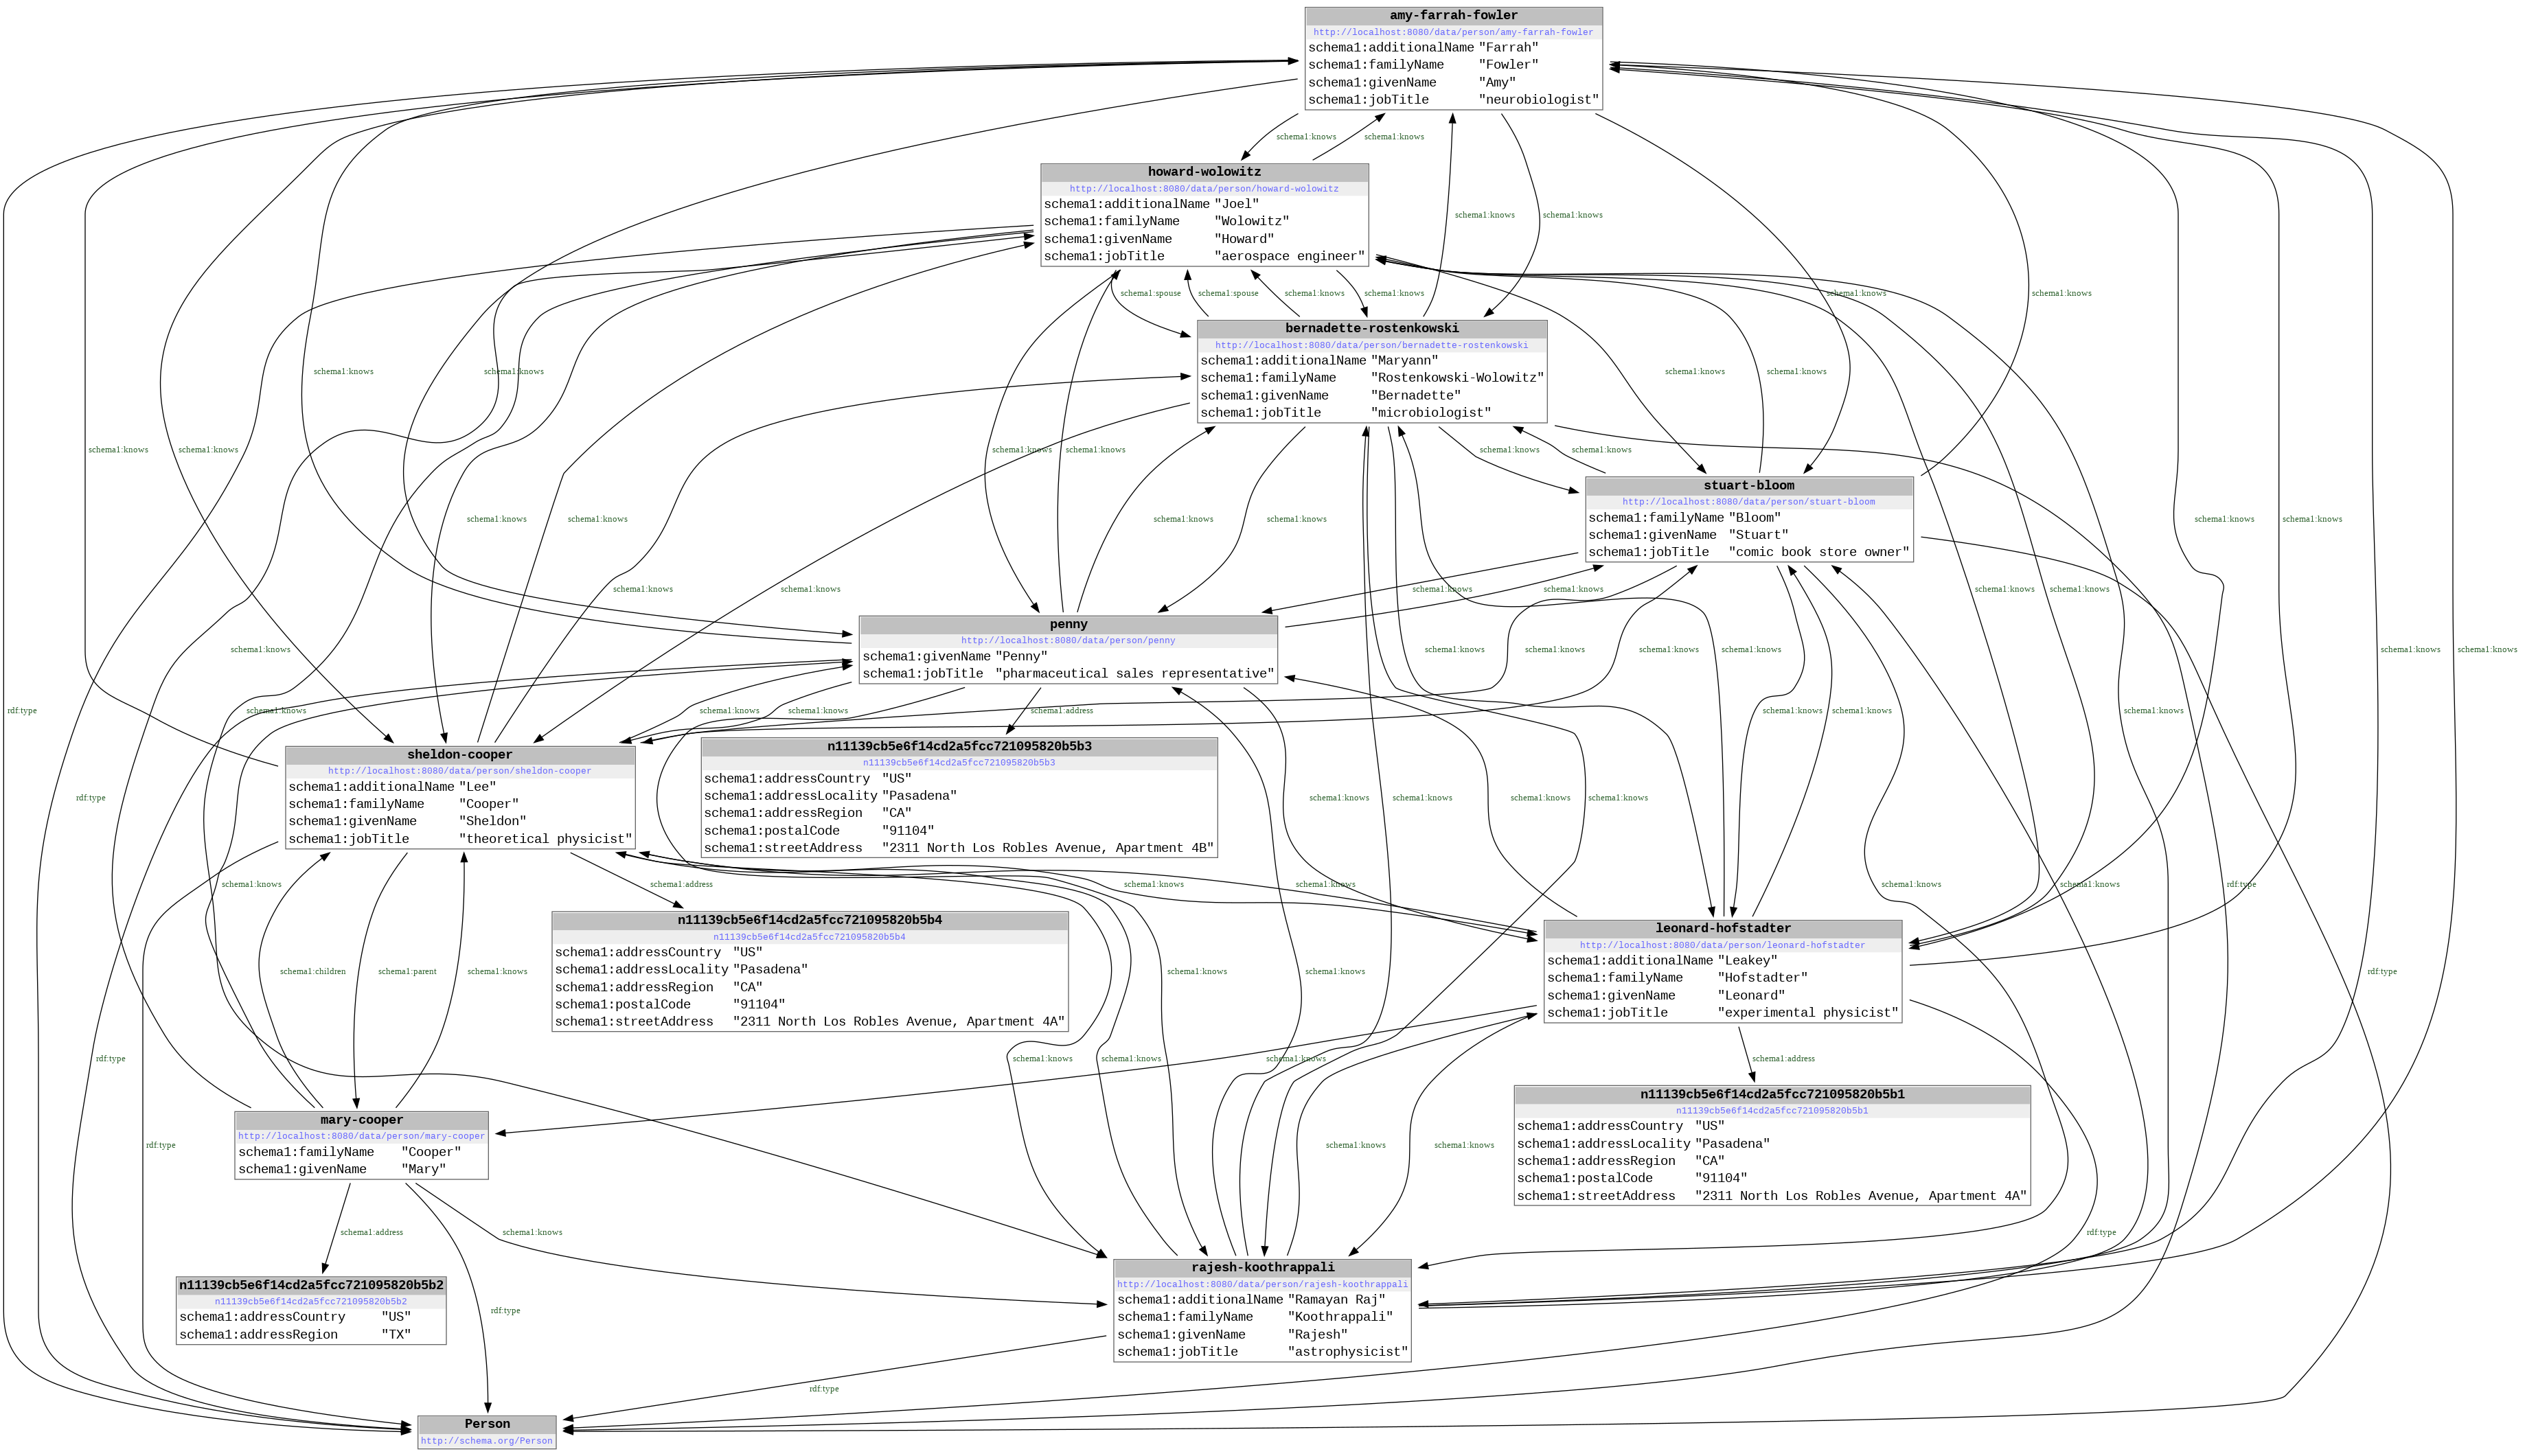

In [7]:
visualize(g)


As we have global identifiers we an also look up facts (triples) about a specific entity:

In [9]:
# Lookup Jane by global identifier
penny = URIRef('http://localhost:8080/data/person/penny')
print([o for o in g.predicate_objects(subject=penny)])

[(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://schema.org/Person')), (rdflib.term.URIRef('http://schema.org/address'), rdflib.term.BNode('n11139cb5e6f14cd2a5fcc721095820b5b3')), (rdflib.term.URIRef('http://schema.org/givenName'), rdflib.term.Literal('Penny')), (rdflib.term.URIRef('http://schema.org/jobTitle'), rdflib.term.Literal('pharmaceutical sales representative')), (rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/amy-farrah-fowler')), (rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/bernadette-rostenkowski')), (rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz')), (rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/leonard-hofstadter')), (rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http:

# SPARQL

SPARQL allows us to query our graph using a SQL like language:

In [11]:
# list all facts (triples)
result = g.query(
    """SELECT ?s ?p ?o
  WHERE
  {?s ?p ?o}
  LIMIT 100
""")

# Output result
for row in result:
    print(row)


(rdflib.term.URIRef('http://localhost:8080/data/person/amy-farrah-fowler'), rdflib.term.URIRef('http://schema.org/knows'), rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz'))
(rdflib.term.URIRef('http://localhost:8080/data/person/bernadette-rostenkowski'), rdflib.term.URIRef('http://schema.org/spouse'), rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/givenName'), rdflib.term.Literal('Rajesh'))
(rdflib.term.BNode('n11139cb5e6f14cd2a5fcc721095820b5b2'), rdflib.term.URIRef('http://schema.org/addressCountry'), rdflib.term.Literal('US'))
(rdflib.term.URIRef('http://localhost:8080/data/person/howard-wolowitz'), rdflib.term.URIRef('http://schema.org/jobTitle'), rdflib.term.Literal('aerospace engineer'))
(rdflib.term.URIRef('http://localhost:8080/data/person/rajesh-koothrappali'), rdflib.term.URIRef('http://schema.org/familyName'), rd

We can leverage URIs, variables, and predicates to specify pattern we are looking for. In this case we want to idenify all pairs of people knowing each other.

In [12]:
result = g.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a schema:knows ?b .
          ?a schema:givenName ?aname .
          ?b schema:givenName ?bname .
       }""",
    initNs={ 'schema': 'http://schema.org/' })

# Output result
for row in result:
    print("%s knows %s" % row)

Amy knows Bernadette
Howard knows Bernadette
Leonard knows Bernadette
Penny knows Bernadette
Rajesh knows Bernadette
Sheldon knows Bernadette
Stuart knows Bernadette
Amy knows Howard
Bernadette knows Howard
Leonard knows Howard
Mary knows Howard
Penny knows Howard
Rajesh knows Howard
Sheldon knows Howard
Stuart knows Howard
Amy knows Leonard
Bernadette knows Leonard
Howard knows Leonard
Penny knows Leonard
Rajesh knows Leonard
Sheldon knows Leonard
Stuart knows Leonard
Amy knows Penny
Bernadette knows Penny
Howard knows Penny
Leonard knows Penny
Mary knows Penny
Rajesh knows Penny
Sheldon knows Penny
Stuart knows Penny
Amy knows Rajesh
Bernadette knows Rajesh
Howard knows Rajesh
Leonard knows Rajesh
Mary knows Rajesh
Penny knows Rajesh
Sheldon knows Rajesh
Stuart knows Rajesh
Amy knows Sheldon
Bernadette knows Sheldon
Howard knows Sheldon
Leonard knows Sheldon
Mary knows Sheldon
Penny knows Sheldon
Rajesh knows Sheldon
Stuart knows Sheldon
Amy knows Stuart
Bernadette knows Stuart
Howar

In [13]:
result = g.query(
    """SELECT DISTINCT ?aname
       WHERE {
          ?a a schema:Person .
          ?a schema:givenName ?aname .
       }""", initNs={ 'schema': 'http://schema.org/' })

# Output result
for row in result:
    print("%s" % row)

Amy
Bernadette
Howard
Leonard
Mary
Penny
Rajesh
Sheldon
Stuart


In [16]:
result = g.query(
    """SELECT (COUNT(*) as ?count)
       WHERE {
          ?a schema:knows ?b .
       }""", initNs={ 'schema': 'http://schema.org/' })

# Output result
for row in result:
    print("%s" % row)

61


In [22]:
result = g.query(
    """SELECT  ?a ?b
       WHERE {
          ?a schema:knows ?b .
          FILTER NOT EXISTS { ?b schema:knows ?a . } .
       }""", initNs={ 'schema': 'http://schema.org/' })

# Output result
for row in result:
    print("%s not %s" % row)

http://localhost:8080/data/person/mary-cooper not http://localhost:8080/data/person/howard-wolowitz
http://localhost:8080/data/person/mary-cooper not http://localhost:8080/data/person/penny
http://localhost:8080/data/person/mary-cooper not http://localhost:8080/data/person/rajesh-koothrappali
http://localhost:8080/data/person/mary-cooper not http://localhost:8080/data/person/sheldon-cooper
http://localhost:8080/data/person/leonard-hofstadter not http://localhost:8080/data/person/mary-cooper
